# **Tarea Nº 2**

In [ ]:
# Calificación: 15

Curso:          Fundamentos de Programación en Python para Macroeconomía y Finanzas     
Profesor:       Victor Fuentes Campos     

- Fecha y hora de entrega: Sábado 6 de enero, 11:59pm
- Agregue los nombres de las personas con las que discutió esta tarea: ____ Armando Paredes ______
- Envíe su tarea haciendo el `push` de su código a su repo en GitHub Classroom: 

## Filtering rows

1. Import the `flights.csv` dataset. Find all flights that:

    a. Had an arrival delay of three or more hours

    b. Flew to Houston (IAH or HOU)

    c. Were operated by United, American, or Southwest

    d. Departed in spring (March, April, and June)

    e. Arrived more than two hours late, but didn’t leave late
    
    f. Were delayed by at least an hour, but made up over 30 minutes in flight 7. Departed between midnight and 5am (inclusive)

In [3]:
# Solution
import pandas as pd

# 1. Import the flights.csv dataset
flights = pd.read_csv("flights.csv")

# a. Find flights with arrival delay of 3 or more hours
delayed_flights = flights[flights["arr_delay"] >= 3]          # X: It should be 3*60

# b. Find flights that flew to Houston (IAH or HOU)
houston_flights = flights[flights["dest"].isin(["IAH", "HOU"])]

# c. Find flights operated by United, American, or Southwest
airlines = ["UA", "AA", "WN"]
specific_airlines_flights = flights[flights["carrier"].isin(airlines)]

# d. Find flights that departed in spring (March, April, and June)
spring_months = ["Mar", "Apr", "Jun"]                               # X: months are numbers
spring_flights = flights[flights["month"].isin(spring_months)]

# e. Find flights that arrived more than 2 hours late, but didn't leave late
late_arrival_not_departure = flights[(flights["arr_delay"] > 120) & (flights["dep_delay"] <= 0)]

# f. Find flights delayed by at least an hour, but made up over 30 minutes in flight
delayed_made_up_time = flights[(flights["dep_delay"] >= 60) & (flights["arr_delay"] < flights["dep_delay"] - 30)]

# g. Find flights that departed between midnight and 5am (inclusive)
midnight_to_5am_flights = flights[(flights["dep_time"] >= 0) & (flights["dep_time"] <= 500)]       # X: dep_time <= 500 | dep_time == 2400



In [ ]:
# Grading: -0.5

In [2]:
print(delayed_flights)

        Unnamed: 0  year  month  day  dep_time  sched_dep_time  dep_delay  \
0                1  2013      1    1     517.0             515        2.0   
1                2  2013      1    1     533.0             529        4.0   
2                3  2013      1    1     542.0             540        2.0   
5                6  2013      1    1     554.0             558       -4.0   
6                7  2013      1    1     555.0             600       -5.0   
...            ...   ...    ...  ...       ...             ...        ...   
336758      336759  2013      9   30    2203.0            2205       -2.0   
336759      336760  2013      9   30    2207.0            2140       27.0   
336760      336761  2013      9   30    2211.0            2059       72.0   
336762      336763  2013      9   30    2233.0            2113       80.0   
336763      336764  2013      9   30    2235.0            2001      154.0   

        arr_time  sched_arr_time  arr_delay carrier  flight tailnum origin 

In [3]:
print(houston_flights)

        Unnamed: 0  year  month  day  dep_time  sched_dep_time  dep_delay  \
0                1  2013      1    1     517.0             515        2.0   
1                2  2013      1    1     533.0             529        4.0   
32              33  2013      1    1     623.0             627       -4.0   
81              82  2013      1    1     728.0             732       -4.0   
89              90  2013      1    1     739.0             739        0.0   
...            ...   ...    ...  ...       ...             ...        ...   
336524      336525  2013      9   30    1729.0            1720        9.0   
336527      336528  2013      9   30    1735.0            1715       20.0   
336618      336619  2013      9   30    1859.0            1859        0.0   
336694      336695  2013      9   30    2015.0            2015        0.0   
336737      336738  2013      9   30    2105.0            2106       -1.0   

        arr_time  sched_arr_time  arr_delay carrier  flight tailnum origin 

In [4]:
print (specific_airlines_flights)

        Unnamed: 0  year  month  day  dep_time  sched_dep_time  dep_delay  \
0                1  2013      1    1     517.0             515        2.0   
1                2  2013      1    1     533.0             529        4.0   
2                3  2013      1    1     542.0             540        2.0   
5                6  2013      1    1     554.0             558       -4.0   
9               10  2013      1    1     558.0             600       -2.0   
...            ...   ...    ...  ...       ...             ...        ...   
336736      336737  2013      9   30    2104.0            2030       34.0   
336737      336738  2013      9   30    2105.0            2106       -1.0   
336751      336752  2013      9   30    2140.0            2140        0.0   
336755      336756  2013      9   30    2149.0            2156       -7.0   
336762      336763  2013      9   30    2233.0            2113       80.0   

        arr_time  sched_arr_time  arr_delay carrier  flight tailnum origin 

In [5]:
print (spring_flights)

Empty DataFrame
Columns: [Unnamed: 0, year, month, day, dep_time, sched_dep_time, dep_delay, arr_time, sched_arr_time, arr_delay, carrier, flight, tailnum, origin, dest, air_time, distance, hour, minute, time_hour]
Index: []


2. a- How many flights have a missing dep_time? b- What other variables are missing? c- What might these rows represent?

In [6]:
# Solution

# a- 
missing_dep_time_count = flights["dep_time"].isnull().sum()
print("Number of flights with missing dep_time:", missing_dep_time_count)


Number of flights with missing dep_time: 8255
Missing values in each column:
 Unnamed: 0           0
year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
dtype: int64
Rows with missing dep_time:
         Unnamed: 0  year  month  day  dep_time  sched_dep_time  dep_delay  \
838            839  2013      1    1       NaN            1630        NaN   
839            840  2013      1    1       NaN            1935        NaN   
840            841  2013      1    1       NaN            1500        NaN   
841            842  2013      1    1       NaN             600        NaN   
1777          1778  2013      1    

In [7]:
# 2. b-
missing_values = flights.isnull().sum()
print("Missing values in each column:\n", missing_values)



Missing values in each column:
 Unnamed: 0           0
year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
dtype: int64


In [8]:
# 3. c-
missing_dep_time_rows = flights[flights["dep_time"].isnull()]
print("Rows with missing dep_time:\n", missing_dep_time_rows)

Rows with missing dep_time:
         Unnamed: 0  year  month  day  dep_time  sched_dep_time  dep_delay  \
838            839  2013      1    1       NaN            1630        NaN   
839            840  2013      1    1       NaN            1935        NaN   
840            841  2013      1    1       NaN            1500        NaN   
841            842  2013      1    1       NaN             600        NaN   
1777          1778  2013      1    2       NaN            1540        NaN   
...            ...   ...    ...  ...       ...             ...        ...   
336771      336772  2013      9   30       NaN            1455        NaN   
336772      336773  2013      9   30       NaN            2200        NaN   
336773      336774  2013      9   30       NaN            1210        NaN   
336774      336775  2013      9   30       NaN            1159        NaN   
336775      336776  2013      9   30       NaN             840        NaN   

        arr_time  sched_arr_time  arr_delay ca

3. What happens to observations **with missing values in `arr_time`** when you filter by **`arr_time == 1800`**? Why? (Hint: compare `2000 == 1800`, `1800 == 1800`, and `NA == 1800`).

In [3]:
# Solution
import pandas as pd
import numpy as np

# Sample DataFrame with missing values
data = {'arr_time': [1800, 2000, np.nan, 1800, np.nan]}
df = pd.DataFrame(data)

# Filter by arr_time == 1800
filtered_df = df[df['arr_time'] == 1800]

print("Original DataFrame:\n", df)
print("\nFiltered DataFrame:\n", filtered_df)


Original DataFrame:
    arr_time
0    1800.0
1    2000.0
2       NaN
3    1800.0
4       NaN

Filtered DataFrame:
    arr_time
0    1800.0
3    1800.0


4. What does `False & None` evaluate to? Why?

In [ ]:
# Solution

In [ ]:
# Grading: -1

## Select columns

5. Brainstorm as many distinct ways as possible to select `dep_time`, `dep_delay`, `arr_time`, and `arr_delay` from `flights`.

In [10]:
# Solution
selected_data = flights[["dep_time", "dep_delay", "arr_time", "arr_delay"]]
print(selected_data)

        dep_time  dep_delay  arr_time  arr_delay
0          517.0        2.0     830.0       11.0
1          533.0        4.0     850.0       20.0
2          542.0        2.0     923.0       33.0
3          544.0       -1.0    1004.0      -18.0
4          554.0       -6.0     812.0      -25.0
...          ...        ...       ...        ...
336771       NaN        NaN       NaN        NaN
336772       NaN        NaN       NaN        NaN
336773       NaN        NaN       NaN        NaN
336774       NaN        NaN       NaN        NaN
336775       NaN        NaN       NaN        NaN

[336776 rows x 4 columns]


In [ ]:
# Grading: -1

## Sort columns

6. Sort flights to find the most delayed flights by arrival time. Hint: End your code with head(1) to only print that row.

In [11]:
# Solution
most_delayed_flight = flights.sort_values(by="arr_delay", ascending=False).head(1)
print(most_delayed_flight)


      Unnamed: 0  year  month  day  dep_time  sched_dep_time  dep_delay  \
7072        7073  2013      1    9     641.0             900     1301.0   

      arr_time  sched_arr_time  arr_delay carrier  flight tailnum origin dest  \
7072    1242.0            1530     1272.0      HA      51  N384HA    JFK  HNL   

      air_time  distance  hour  minute            time_hour  
7072     640.0      4983     9       0  2013-01-09 09:00:00  


7. Find the top 5 flights that left earliest relative to their scheduled departure. Only show the tail number, date and number of minutes early they departed at.

In [15]:
# Solution
earliest_flights = flights.sort_values(by="dep_delay", ascending=True).head(5)[["tailnum", "dep_time", "dep_delay"]]
print(earliest_flights)


       tailnum  dep_time  dep_delay
89673   N592JB    2040.0      -43.0
113633  N612DL    2022.0      -33.0
64501   N825AS    1408.0      -32.0
9619    N934DL    1900.0      -30.0
24915   N208FR    1703.0      -27.0


In [ ]:
8. How could you sort all missing values to the start? 

In [18]:
# Solution
flights.replace(np.nan, -999, inplace=True)

# Sort by missing values
flights_with_missing_first = flights.sort_values(by="dep_time", na_position="first")
print(flights_with_missing_first)


        Unnamed: 0  year  month  day  dep_time  sched_dep_time  dep_delay  \
336775      336776  2013      9   30    -999.0             840     -999.0   
126054      126055  2013      2   17    -999.0            1500     -999.0   
126055      126056  2013      2   17    -999.0             645     -999.0   
126056      126057  2013      2   17    -999.0            1400     -999.0   
126057      126058  2013      2   17    -999.0            1600     -999.0   
...            ...   ...    ...  ...       ...             ...        ...   
276812      276813  2013      7   28    2400.0            2059      181.0   
276813      276814  2013      7   28    2400.0            2359        1.0   
262457      262458  2013      7   13    2400.0            2245       75.0   
266385      266386  2013      7   17    2400.0            2142      138.0   
299009      299010  2013      8   20    2400.0            2359        1.0   

        arr_time  sched_arr_time  arr_delay carrier  flight tailnum origin 

## Add new variables 

9. Currently `dep_time` and `arr_time` are convenient to look at, but hard to compute with because they’re not really continuous numbers. Convert them to number of minutes since midnight in new vars called `arr_time_min` and `dep_time_min`

In [7]:
# Solution
flights["dep_time_min"] = flights["dep_time"].apply(
    lambda x: (x // 100 * 60 + x % 100)          
)
flights["arr_time_min"] = flights["arr_time"].apply(
    lambda x: (x // 100 * 60 + x % 100) 
)


print(flights[["dep_time", "dep_time_min", "arr_time", "arr_time_min"]])


        dep_time  dep_time_min  arr_time  arr_time_min
0          517.0         317.0     830.0         510.0
1          533.0         333.0     850.0         530.0
2          542.0         342.0     923.0         563.0
3          544.0         344.0    1004.0         604.0
4          554.0         354.0     812.0         492.0
...          ...           ...       ...           ...
336771       NaN           NaN       NaN           NaN
336772       NaN           NaN       NaN           NaN
336773       NaN           NaN       NaN           NaN
336774       NaN           NaN       NaN           NaN
336775       NaN           NaN       NaN           NaN

[336776 rows x 4 columns]


10. Make a plot to compare `air_time` with `arr_time_min` - `dep_time_min`

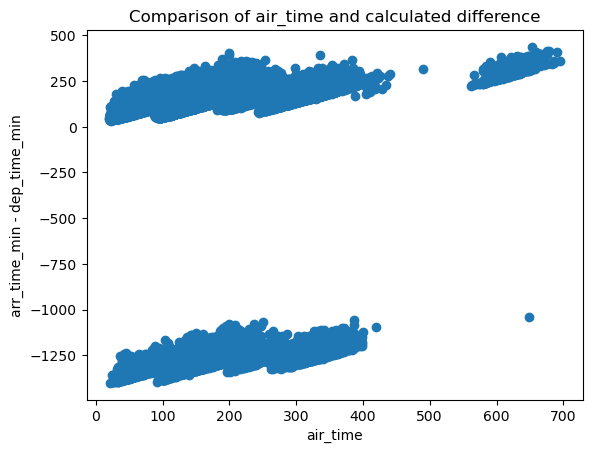

In [8]:
# Solution
import matplotlib.pyplot as plt

plt.scatter(flights["air_time"], flights["arr_time_min"] - flights["dep_time_min"])
plt.xlabel("air_time")
plt.ylabel("arr_time_min - dep_time_min")
plt.title("Comparison of air_time and calculated difference")
plt.show()


11. We expect `air_time` and `arr_time_min` - `dep_time_min` to be the same, but they’re not. Why not?
Identify a major data issue and subtle one.

In [ ]:
# Solution
#major data: diferencias de zona horaria entre los aeropuertos de salida y de llegada.
#subtle one: posibles errores de redondeo o inconsistencias en la recopilación de datos.

# Main reason: overnight flights. Departing in day X, arrivin in day X+1

In [ ]:
# Grading: -1

12. Implement your fix to the major probelm. Remake the plot from the previous question.

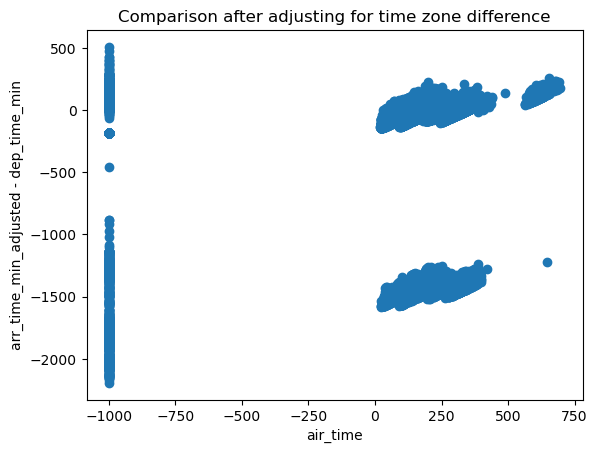

In [21]:
# Solution
flights["arr_time_min_adjusted"] = flights["arr_time_min"] - 180

plt.scatter(flights["air_time"], flights["arr_time_min_adjusted"] - flights["dep_time_min"])
plt.xlabel("air_time")
plt.ylabel("arr_time_min_adjusted - dep_time_min")
plt.title("Comparison after adjusting for time zone difference")
plt.show()


13. Find the 10 most delayed flights 

In [22]:
# Solution
most_delayed_flights = flights.sort_values(by="arr_delay", ascending=False).head(10)
print(most_delayed_flights)


        Unnamed: 0  year  month  day  dep_time  sched_dep_time  dep_delay  \
7072          7073  2013      1    9     641.0             900     1301.0   
235778      235779  2013      6   15    1432.0            1935     1137.0   
8239          8240  2013      1   10    1121.0            1635     1126.0   
327043      327044  2013      9   20    1139.0            1845     1014.0   
270376      270377  2013      7   22     845.0            1600     1005.0   
173992      173993  2013      4   10    1100.0            1900      960.0   
151974      151975  2013      3   17    2321.0             810      911.0   
270987      270988  2013      7   22    2257.0             759      898.0   
87238        87239  2013     12    5     756.0            1700      896.0   
195711      195712  2013      5    3    1133.0            2055      878.0   

        arr_time  sched_arr_time  arr_delay  ... origin  dest air_time  \
7072      1242.0            1530     1272.0  ...    JFK   HNL    640.0   
2357

## Summarizing grouped data

14. Calculate average delays by destination for flights originating in NYC. Create a variable which ranks destinations from worst to best, where 1 is the worst rank.

In [7]:
# Solution
nyc_flights = flights[flights["origin"] == "NYC"]

avg_delay_by_dest = nyc_flights.groupby("dest")["arr_delay"].mean()

delay_rank_by_dest = avg_delay_by_dest.rank(ascending=False)

print("Average arrival delay by destination for NYC flights:")
print(avg_delay_by_dest)
print("\nDestination delay rank (worst to best):")
print(delay_rank_by_dest)

Average arrival delay by destination for NYC flights:
Series([], Name: arr_delay, dtype: float64)

Destination delay rank (worst to best):
Series([], Name: arr_delay, dtype: float64)


In [ ]:
# Grading: -1

15. Which plane (`tailnum`) has the most minutes of delays total?

In [24]:
# Solution
total_delay_per_plane = flights.groupby("tailnum")["arr_delay"].sum()
most_delayed_plane = total_delay_per_plane.idxmax()

print("Plane with the most total delay minutes:", most_delayed_plane)


Plane with the most total delay minutes: N179JB


16. Which airlines only offer flights from New York to one other airport?

In [8]:
# Solution
unique_dest_count_per_airline = flights.groupby("carrier")["dest"].nunique()
airlines_with_one_dest = unique_dest_count_per_airline[unique_dest_count_per_airline == 2].index

print("Airlines with flights only from NYC to one other airport:", airlines_with_one_dest)


Airlines with flights only from NYC to one other airport: Index([], dtype='object', name='carrier')


In [ ]:
# Grading: -1

17. Calculate the median arrival delay by airline.

In [10]:
# Solution
median_delay_by_airline = flights.groupby("carrier")["arr_delay"].median()
median_delay_by_airline


carrier
9E    -7.0
AA    -9.0
AS   -17.0
B6    -3.0
DL    -8.0
EV    -1.0
F9     6.0
FL     5.0
HA   -13.0
MQ    -1.0
OO    -7.0
UA    -6.0
US    -6.0
VX    -9.0
WN    -3.0
YV    -2.0
Name: arr_delay, dtype: float64

18. ExpressJet has a median arrival delay of -1 minutes while US Airways has a median arrival delay of -6 minutes. Does this tell you that US Airways is a more reliable airline? Why or why not?


In [30]:
# Solution
# No, un retraso medio de -1 minuto para ExpressJet y -6 minutos para US Airways, no podemos decir que US Airways sea más confiable. La mediana es sensible a los valores atípicos y puede no reflejar retrasos típicos. 

19. Median arrival delay may not be the best metric for our needs. Brainstorm at least 4 additional ways to assess the typical delay characteristics of a group of flights.

In [31]:
# Solution
#Retraso absoluto promedio: menos sensible a los valores atípicos que la mediana.
#Porcentaje de llegadas a tiempo: muestra la proporción de vuelos que llegan dentro de un umbral establecido.
#Rango intercuartil (IQR): captura la dispersión de los retrasos e identifica posibles valores atípicos.
#Retraso percentil 90: muestra el retraso experimentado por el 90% de los vuelos, destacando los retrasos extremos.

20. Write a code which calculates your delay measures separately by airline. Do particular airlines perform poorly on multiple metrics?

In [32]:
# Solution
def analyze_airline_delays(flights):
    for airline in flights["carrier"].unique():
        airline_data = flights[flights["carrier"] == airline]
        # Calculate various delay metrics
        avg_abs_delay = airline_data["arr_delay"].abs().mean()
        on_time_pct = (airline_data["arr_delay"] <= 0).mean() * 100
        delay_iqr = airline_data["arr_delay"].quantile(0.75) - airline_data["arr_delay"].quantile(0.25)
        delay_90th_pct = airline_data["arr_delay"].quantile(0.9)
        # Print results for current airline
        print(f"\nAirline: {airline}")
        print(f"\tAverage absolute delay: {avg_abs_delay:.2f} minutes")
        print(f"\tPercentage on-time arrivals: {on_time_pct:.2f}%")
        print(f"\tInterquartile range: {delay_iqr:.2f} minutes")
        print(f"\t90th percentile delay: {delay_90th_pct:.2f} minutes")

analyze_airline_delays(flights.copy())


Airline: UA
	Average absolute delay: 39.30 minutes
	Percentage on-time arrivals: 62.12%
	Interquartile range: 30.00 minutes
	90th percentile delay: 42.00 minutes

Airline: AA
	Average absolute delay: 48.55 minutes
	Percentage on-time arrivals: 67.29%
	Interquartile range: 30.00 minutes
	90th percentile delay: 37.00 minutes

Airline: B6
	Average absolute delay: 35.94 minutes
	Percentage on-time arrivals: 56.79%
	Interquartile range: 32.00 minutes
	90th percentile delay: 55.00 minutes

Airline: DL
	Average absolute delay: 33.51 minutes
	Percentage on-time arrivals: 65.88%
	Interquartile range: 28.00 minutes
	90th percentile delay: 36.00 minutes

Airline: EV
	Average absolute delay: 85.25 minutes
	Percentage on-time arrivals: 54.80%
	Interquartile range: 39.00 minutes
	90th percentile delay: 74.00 minutes

Airline: MQ
	Average absolute delay: 74.78 minutes
	Percentage on-time arrivals: 55.70%
	Interquartile range: 31.00 minutes
	90th percentile delay: 54.00 minutes

Airline: US
	Average 

In [11]:
# Grading: -0.5. There is no answer for the question.